In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X_train, X_test, y_train, y_test = load('classification_data.joblib')

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from termcolor import colored

In [4]:
def model_info(y_real, y_pred):
    # mere kvaliteta
    print(classification_report(y_real, y_pred))
    
    # matrica konfuzije
    y_true = np.array(y_real)
    y_pred = np.array(y_pred)

    # kreiranje matrice konfuzije
    conf_matrix = confusion_matrix(y_true, y_pred)

    # kreiranje heatmap-e za matricu konfuzije
    plt.figure(figsize = (3, 3))
    class_names = [-1, 0, 1]
    sns.heatmap(conf_matrix, annot = True, cmap = 'Greens', fmt = 'd', cbar = True, xticklabels = class_names, yticklabels = class_names)
    plt.xlabel('Predict values')
    plt.ylabel('Real values')
    plt.title('Confusion matrix')
    plt.show()

In [5]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return model, y_train_pred, y_test_pred

# Stablo odlučivanja

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc_model, y_train_pred_dtc, y_test_pred_dtc = build_model(dtc, X_train, X_test, y_train, y_test)

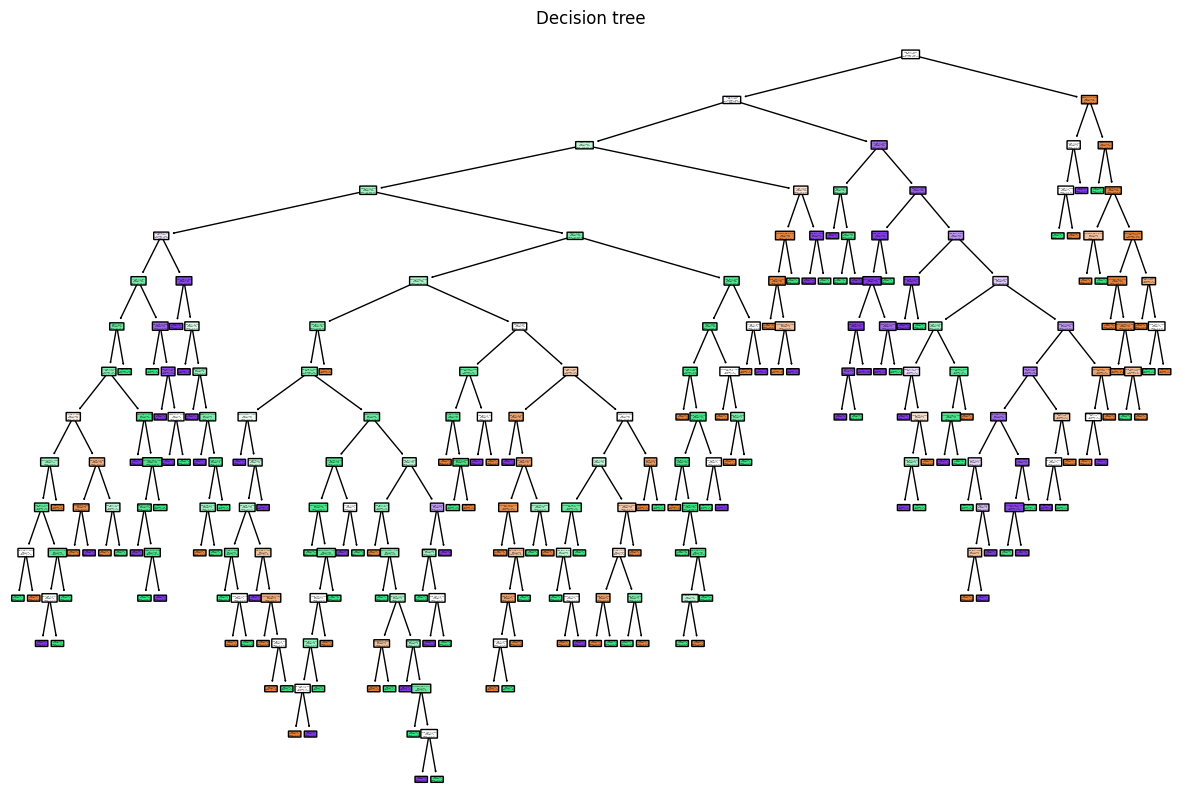

Broj čvorova: 287, dubina: 16


In [8]:
# vizualizacija stabla odlučivanja
plt.figure(figsize=(15, 10))
plot_tree(dtc_model, feature_names = X_train.columns, class_names = ['-1', '0', '1'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

# informacije o broju čvorova i dubini
num_nodes = dtc_model.tree_.node_count
depth = dtc_model.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

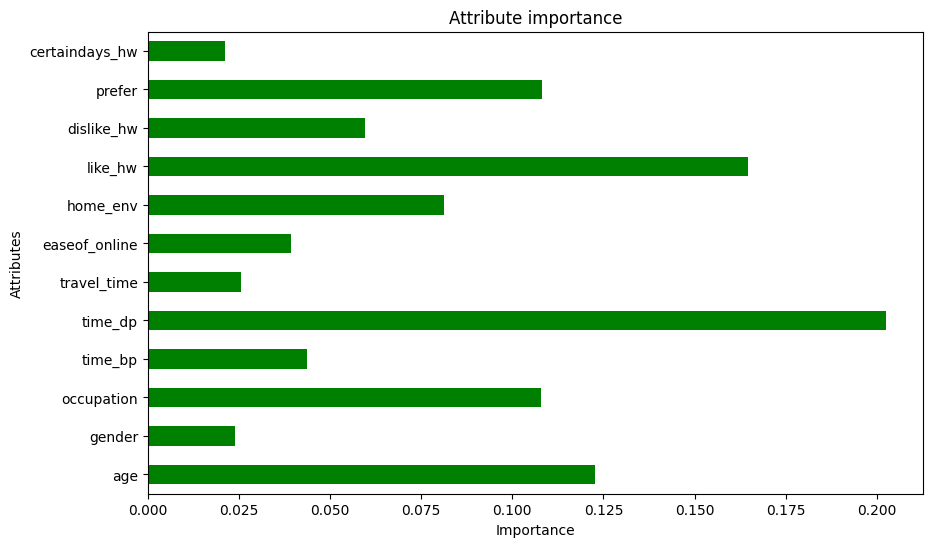

In [9]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



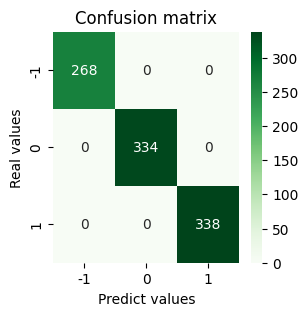


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.81      0.86      0.83        58
           0       0.81      0.84      0.82        94
           1       0.87      0.78      0.82        83

    accuracy                           0.83       235
   macro avg       0.83      0.83      0.83       235
weighted avg       0.83      0.83      0.83       235



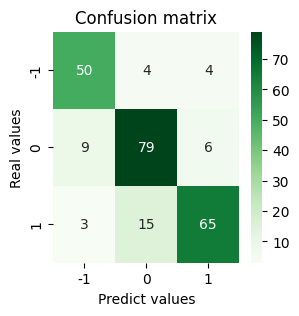

In [10]:
print('Train data:\n')
model_info(y_train, y_train_pred_dtc)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_dtc)

Na osnovu analize rezultata možemo zaključiti da je model odlučivanja tokom treninga pokazao odlične performanse. Međutim, na test skupu rezultati su  mnogo lošiji što ukazuje na određeni stepen preprilagođavanja.

### Podešavanje hiper-parametara modela

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9, 11],
    'min_samples_leaf': [3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}

In [13]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, scoring = 'accuracy')

In [14]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [3, 4, 5, 6]},
             scoring='accuracy')

In [15]:
estimator_dtc.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 4}

In [16]:
estimator_dtc.best_score_

0.8351063829787234

In [17]:
best_model_dtc, y_train_pred_dtccv, y_test_pred_dtccv = build_model(estimator_dtc.best_estimator_, X_train, X_test, y_train, y_test)

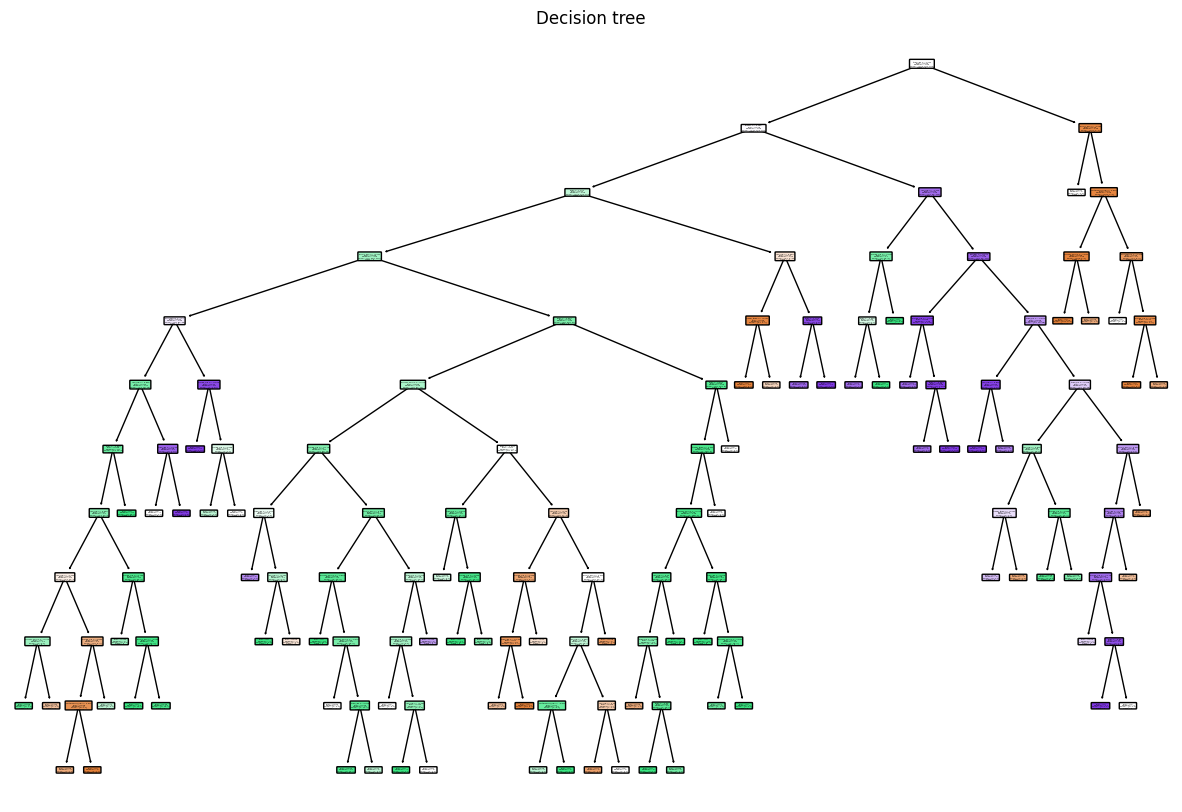

Broj čvorova: 143, dubina: 11


In [18]:
# vizualizacija stabla odlučivanja
plt.figure(figsize=(15, 10))
plot_tree(best_model_dtc, feature_names = X_train.columns, class_names = ['-1', '0', '1'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

# informacije o broju čvorova i dubini
num_nodes = best_model_dtc.tree_.node_count
depth = best_model_dtc.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

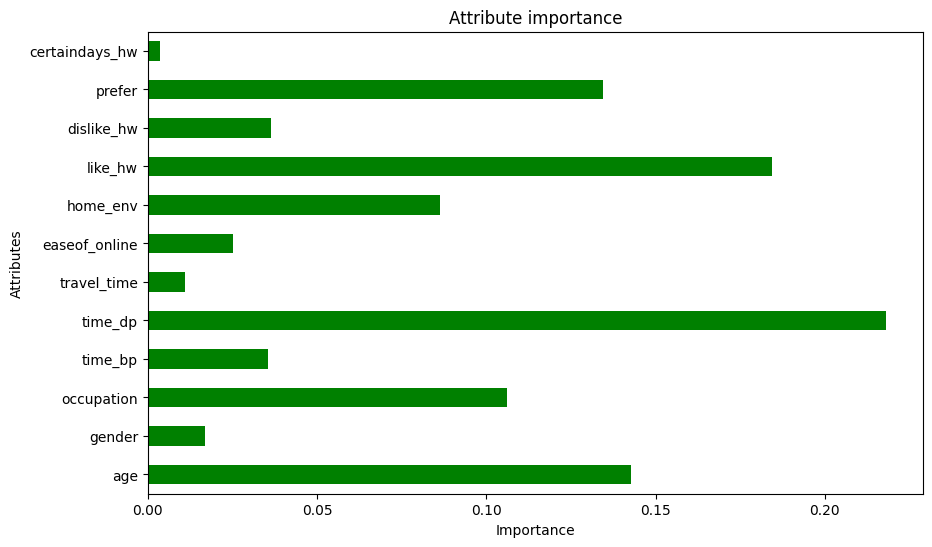

In [19]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       0.86      0.93      0.89       268
           0       0.89      0.86      0.88       334
           1       0.94      0.91      0.92       338

    accuracy                           0.90       940
   macro avg       0.90      0.90      0.90       940
weighted avg       0.90      0.90      0.90       940



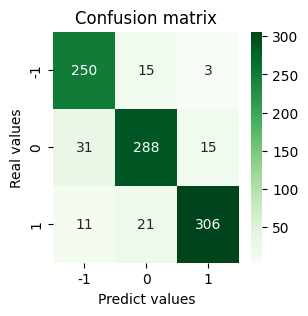


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.76      0.83      0.79        58
           0       0.80      0.86      0.83        94
           1       0.93      0.80      0.86        83

    accuracy                           0.83       235
   macro avg       0.83      0.83      0.83       235
weighted avg       0.84      0.83      0.83       235



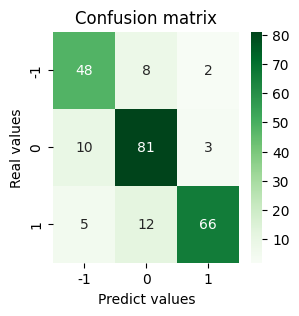

In [20]:
print('Train data:\n')
model_info(y_train, y_train_pred_dtccv)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_dtccv)

Ovaj model pokazuje solidnu sposobnost klasifikacije.

# Slučajne šume

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(random_state = 42)
rf_model, y_train_pred_rf, y_test_pred_rf = build_model(rf, X_train, X_test, y_train, y_test)

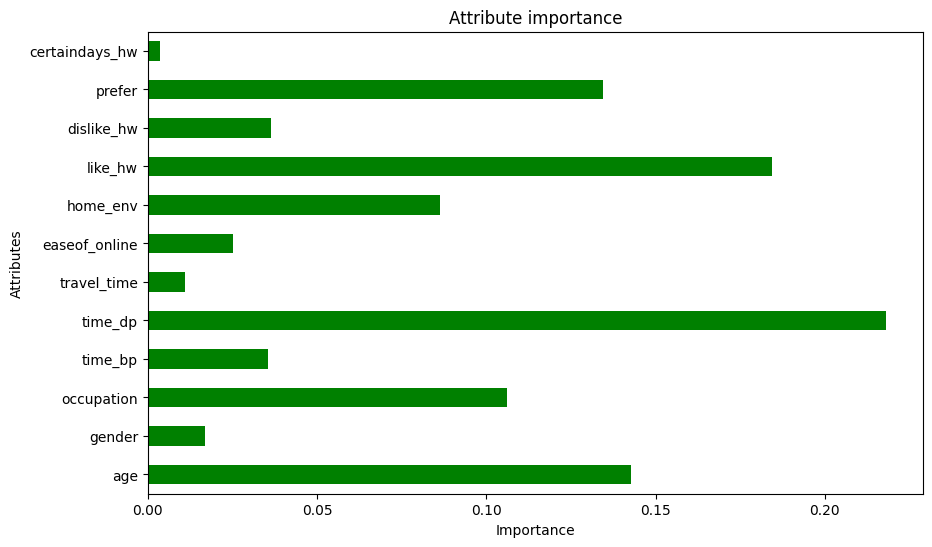

In [23]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



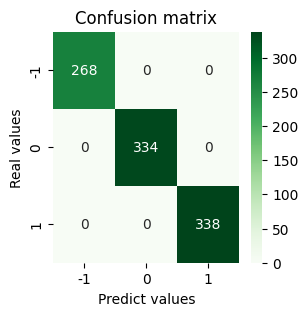


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.83      0.90      0.86        58
           0       0.83      0.84      0.84        94
           1       0.90      0.83      0.86        83

    accuracy                           0.85       235
   macro avg       0.85      0.86      0.85       235
weighted avg       0.85      0.85      0.85       235



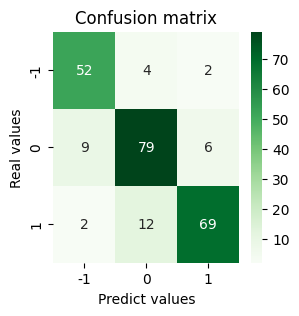

In [24]:
print('Train data:\n')
model_info(y_train, y_train_pred_rf)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_rf)

Došlo je do preprilagođavanja.

### Podešavanje hiper-parametara modela

In [25]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
}

In [26]:
estimator_rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = params)

In [27]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300]})

In [28]:
estimator_rf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [29]:
estimator_rf.best_score_

0.8531914893617021

In [30]:
best_model_rf, y_train_pred_rfcv, y_test_pred_rfcv = build_model(estimator_rf.best_estimator_, X_train, X_test, y_train, y_test)

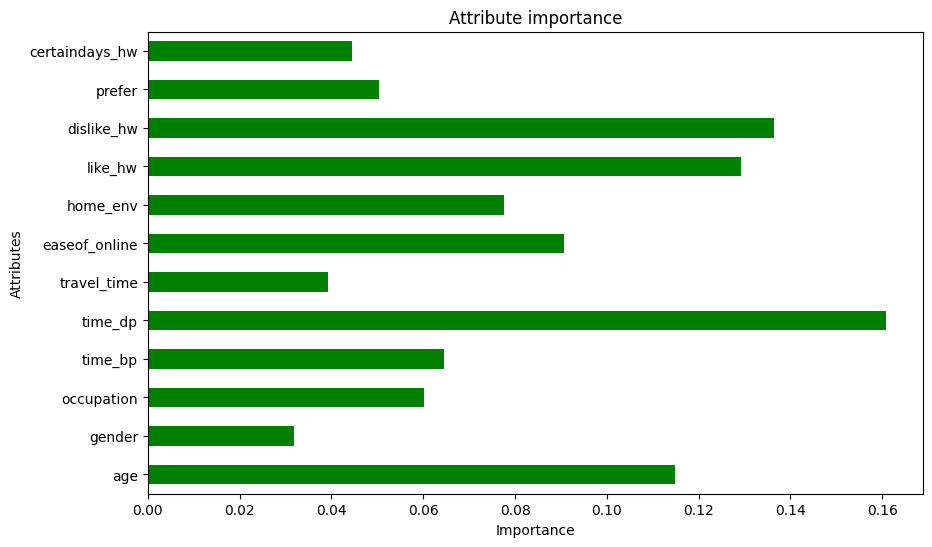

In [31]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



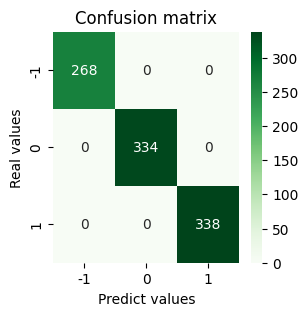


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.84      0.91      0.88        58
           0       0.86      0.85      0.86        94
           1       0.91      0.87      0.89        83

    accuracy                           0.87       235
   macro avg       0.87      0.88      0.87       235
weighted avg       0.87      0.87      0.87       235



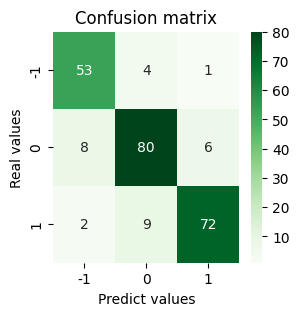

In [32]:
print('Train data:\n')
model_info(y_train, y_train_pred_rfcv)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_rfcv)

Ovaj model pokazuje najbolje, do sada, performanse na oba skupa podataka.

# Poređenje modela

### ROC kriva 

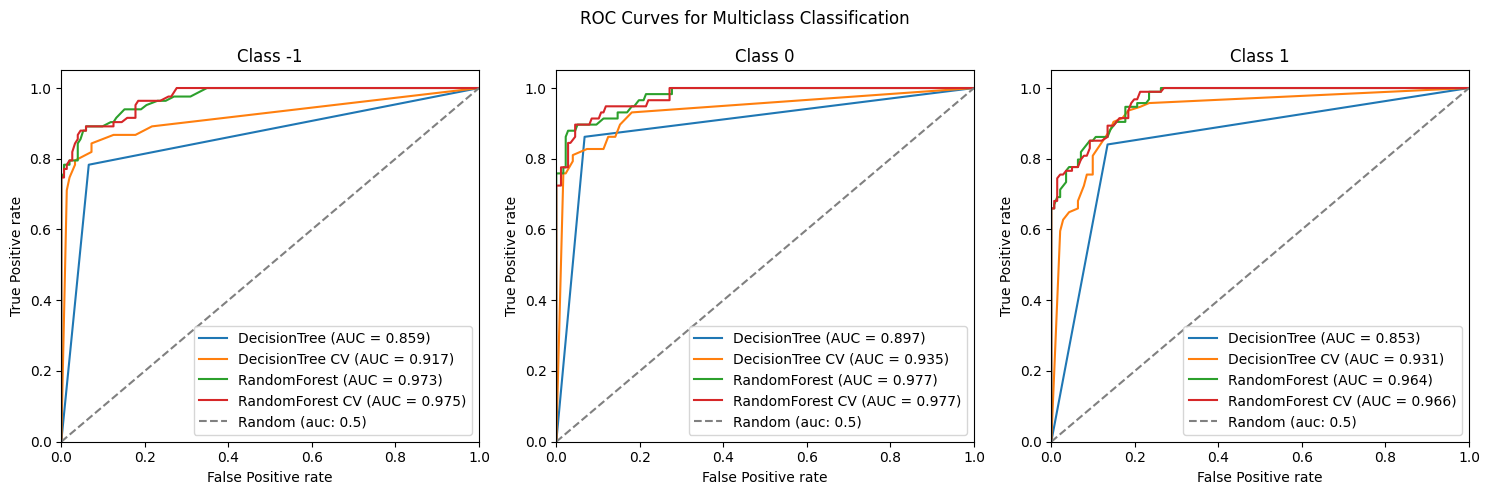

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# binarizacija ciljnih vrednosti (zbog višeklasne klasifikacije)
y_train_bin = label_binarize(y_train, classes=[-1, 0, 1])
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])

# definisanje modela i imena modela
models = [dtc_model, best_model_dtc, rf_model, best_model_rf]
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV']

# inicijalizacija grafa
plt.figure(figsize = (15, 5))

# petlja za svaku klasu
for class_index in range(y_train_bin.shape[1]):
    # prikazivanje svake klase u odvojenom subplotu
    plt.subplot(1, y_train_bin.shape[1], class_index + 1)  
    plt.title(f'Class {class_index - 1}')
    
    # petlja za svaki model
    for model, model_name in zip(models, model_names):
        # izračunavanje vrednosti za ROC krivu i AUC
        y_pred = model.predict_proba(X_test) # Probabilities for positive class
   
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1],  y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)

        # prikazivanje ROC krive za svaki model
        plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.3f})')
        
    plt.plot([0, 1], [0, 1], label = 'Random (auc: 0.5)', color = 'grey', linestyle='--')
    
    # podešavanje osa za svaki subplot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()

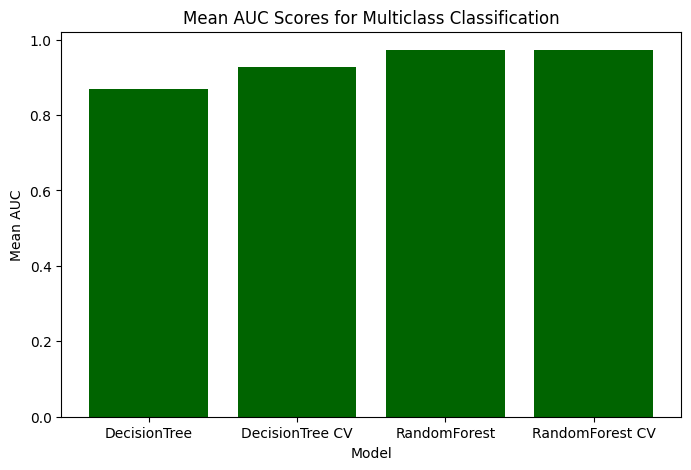

In [34]:
# izračunavanje usrednjenih AUC vrednosti za svaki model
mean_auc_scores = []

for model in models:
    y_pred = model.predict_proba(X_test)
    
    auc_scores = []
    for class_index in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1], y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
    
    mean_auc_scores.append(np.mean(auc_scores))

# vizualizacija usrednjene AUC vrednosti
plt.figure(figsize = (8, 5))
plt.bar(model_names, mean_auc_scores, color = 'darkgreen')
plt.xlabel('Model')
plt.ylabel('Mean AUC')
plt.title('Mean AUC Scores for Multiclass Classification')
plt.show()

### Vizualizacija klasifikacije

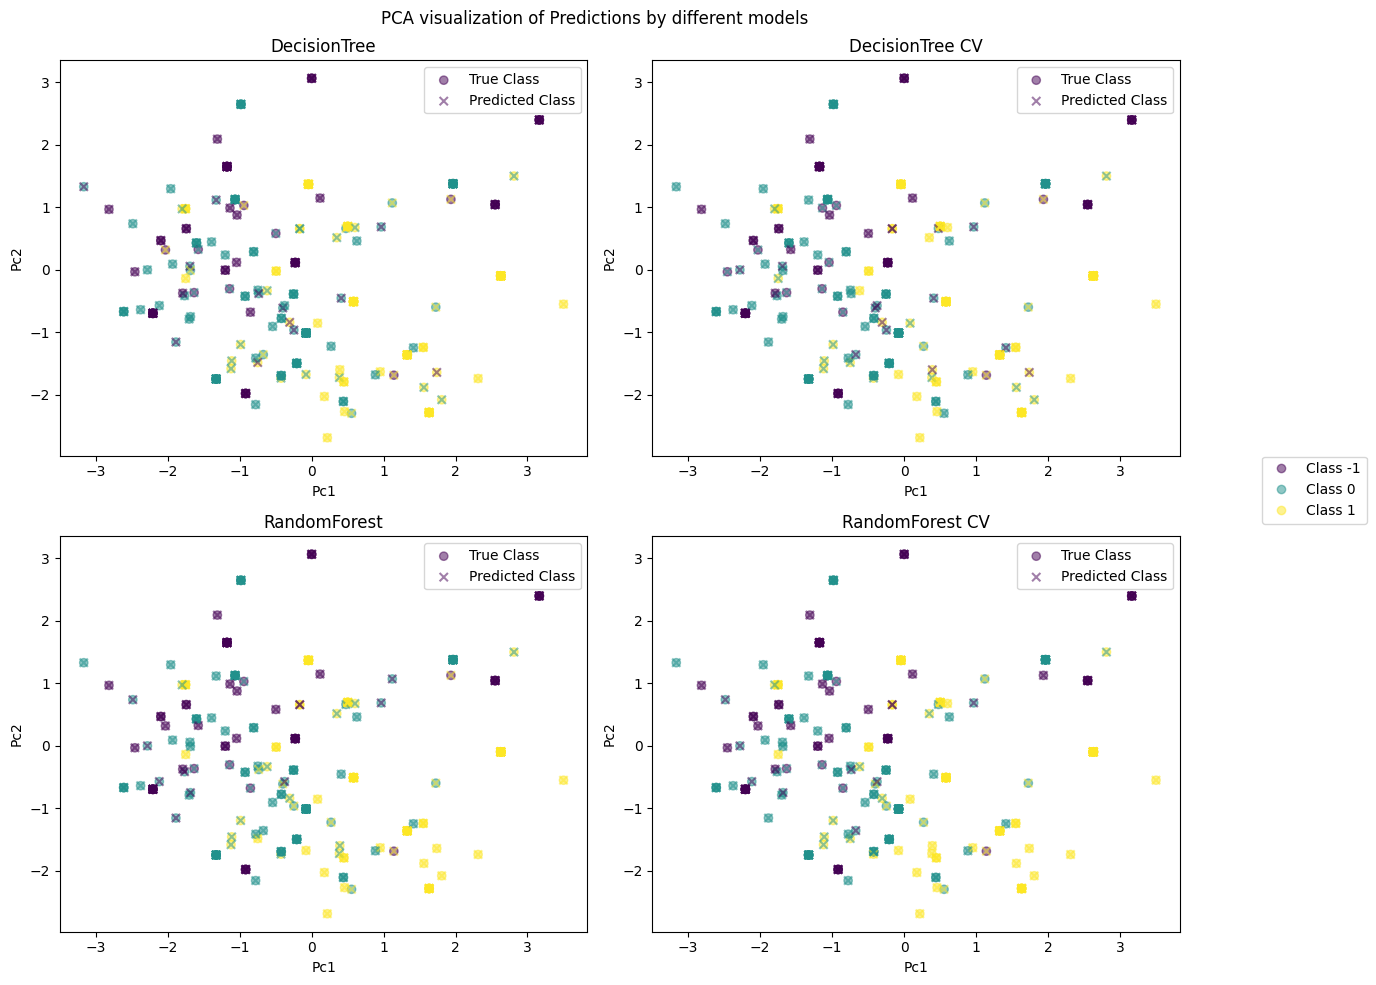

In [35]:
from sklearn.decomposition import PCA

num_dimensions = 2
class_name = y_test.unique()
y_preds = [y_test_pred_dtc, y_test_pred_dtccv, y_test_pred_rf, y_test_pred_rfcv]

# PCA modela
pca = PCA(n_components = num_dimensions)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
           
# raspoređivanje podataka u subplotovima
num_rows = 2
num_cols = 2         
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12, 10))
for row in range(num_rows):
    for col in range(num_cols):
        model_idx = row * num_cols + col
        if model_idx < len(models):
            ax = axes[row, col]
            y_pred = y_preds[row * num_cols + col]
            model_name = model_names[model_idx]
            
            sc1 = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, marker = 'o', label = f'True Class', alpha=0.5)
            sc2 = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_pred, marker = 'x', label = f'Predicted Class', alpha=0.5)
            
            ax.set_title(f'{model_name}')
            ax.set_xlabel('Pc1')
            ax.set_ylabel('Pc2')
            ax.legend()
            
            
# dodavanje legendi na celu figuru
cmap = plt.cm.viridis
color_list = [cmap(i) for i in range(len(np.unique(y_test)))]
fig.legend(handles = sc1.legend_elements()[0], labels = [f'Class {class_idx}' for class_idx in ['-1', '0', '1']], 
           bbox_to_anchor = (1.05, 0.5), loc = 'center left')

plt.suptitle('PCA visualization of Predictions by different models')
plt.tight_layout()
plt.show()

# Čuvanje modela

In [36]:
from joblib import dump

In [37]:
dump(models, 'trees.joblib')

['trees.joblib']